In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('pdf')
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)
from operator import add,sub, truediv
plt.style.use('classic')

In [2]:
organism="Bacteria"

In [3]:

##****Phase diagram1
z=["helix","betasheet","coil","turns"]
dictionary={}
######
col_names=['Index','Name','Structure','Length','Charged-AA','Polar-AA','Non-Polar','FrCharged','FrPositive','FrNegative',
           'FrPolar','Frnonpolar', 'FrNetcharge','ChargedRes','NetChargeProtein']
for sec_st in z:
    dictionary[sec_st]={'FrCharged':0,'Frnonpolar':0}
    filename="../all_"+sec_st+".csv"
    data=pd.read_csv(filename,names =col_names,skiprows=1,skipinitialspace=True)
    names=data.loc[:,'Name']
    #print(len(names))
    data2=data[(data['Charged-AA']>0)]#(data['Length']>10) & (data['Charged-AA']>0)]
    value1=data.loc[:,'FrCharged'].tolist()
    value2=data.loc[:,'Frnonpolar'].tolist()
    value3=data.loc[:,'FrPolar'].tolist()
    value4=data.loc[:,'FrPositive'].tolist()
    value5=data2.loc[:,'FrNegative'].tolist()
    dictionary[sec_st]['FrCharged']=value1
    dictionary[sec_st]['Frnonpolar']=value2
    dictionary[sec_st]['FrPolar']=value3
    dictionary[sec_st]['FrPositive']=value4
    dictionary[sec_st]['FrNegative']=value5

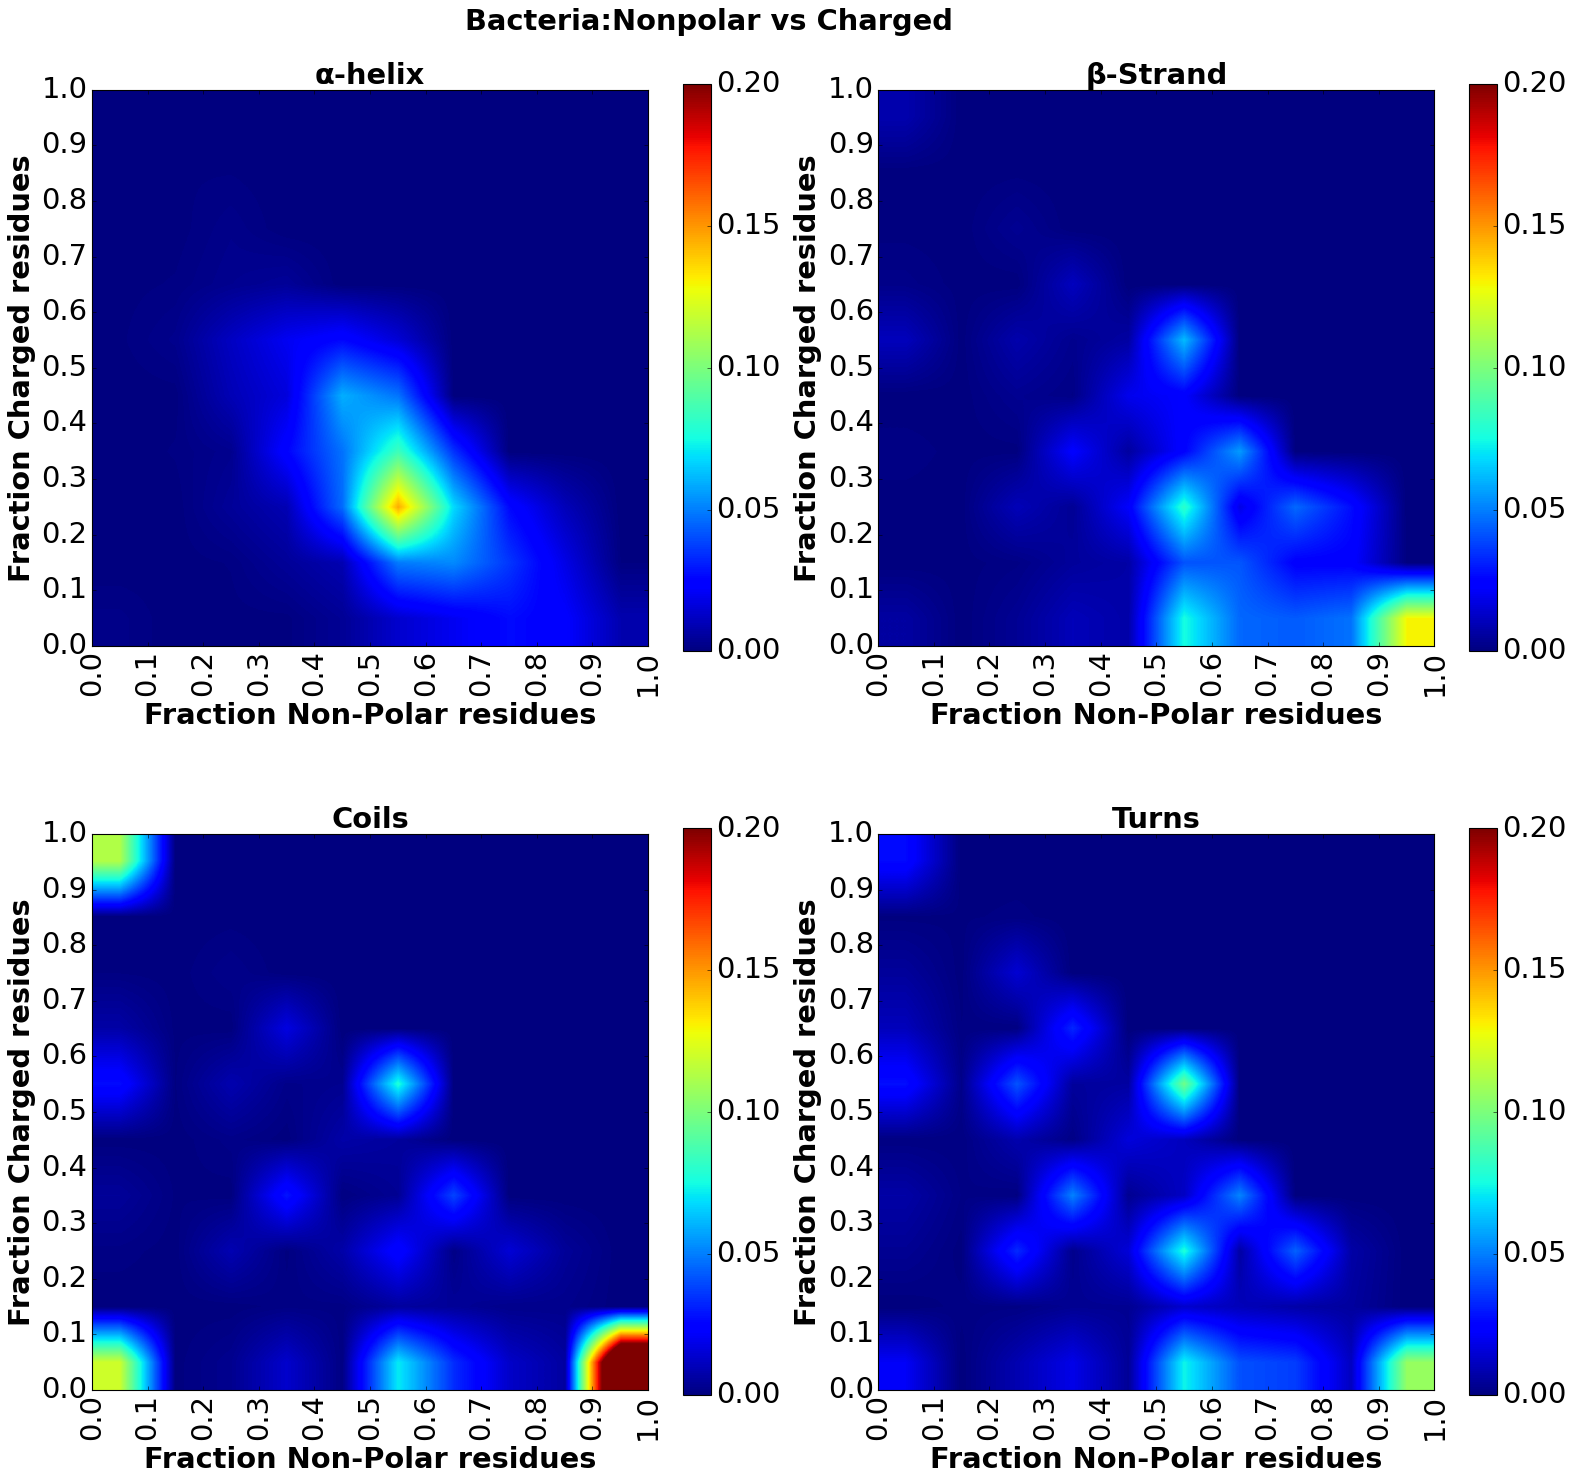

In [4]:
##non-polar--Charged
nbins=np.arange(0.0,1.1,0.1)
histH, xedges, yedges = np.histogram2d(dictionary['helix']['Frnonpolar'],dictionary['helix']['FrCharged'], bins=(nbins, nbins))
norm_histH=histH/len(dictionary['helix']['Frnonpolar'])
histE, xedges, yedges = np.histogram2d(dictionary['betasheet']['Frnonpolar'],dictionary['betasheet']['FrCharged'], bins=(nbins, nbins))
norm_histE=histE/len(dictionary['betasheet']['Frnonpolar'])
histT, xedges, yedges = np.histogram2d(dictionary['turns']['Frnonpolar'],dictionary['turns']['FrCharged'], bins=(nbins, nbins)) 
norm_histT=histT/len(dictionary['turns']['Frnonpolar'])
histC, xedges, yedges = np.histogram2d(dictionary['coil']['Frnonpolar'],dictionary['coil']['FrCharged'], bins=(nbins, nbins))
norm_histC=histC/len(dictionary['coil']['Frnonpolar'])
##
extent = [0.0, 1.0, 0.0, 1.0]
plt.figure(figsize = (20,20),facecolor='white')
plt.suptitle(organism+":Nonpolar vs Charged ", fontsize=26, y=0.95,x=0.45, fontweight="bold")
plt.subplot(2,2,1)
im=plt.imshow(norm_histH.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[1].tick_params(axis="y", labelsize=26)
plt.title("α-helix", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Non-Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,2)
im=plt.imshow(norm_histE.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[3].tick_params(axis="y", labelsize=26)
plt.title("β-Strand", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Non-Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,3)
im=plt.imshow(norm_histC.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[5].tick_params(axis="y", labelsize=26)
plt.title("Coils", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Non-Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,4)
im=plt.imshow(norm_histT.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[7].tick_params(axis="y", labelsize=26)
plt.title("Turns", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Non-Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.tight_layout(h_pad=-0.2, w_pad=0.1)
plt.savefig(organism+"nonpolar_charged-heatmap.png", dpi=150,bbox_inches='tight')
plt.show()

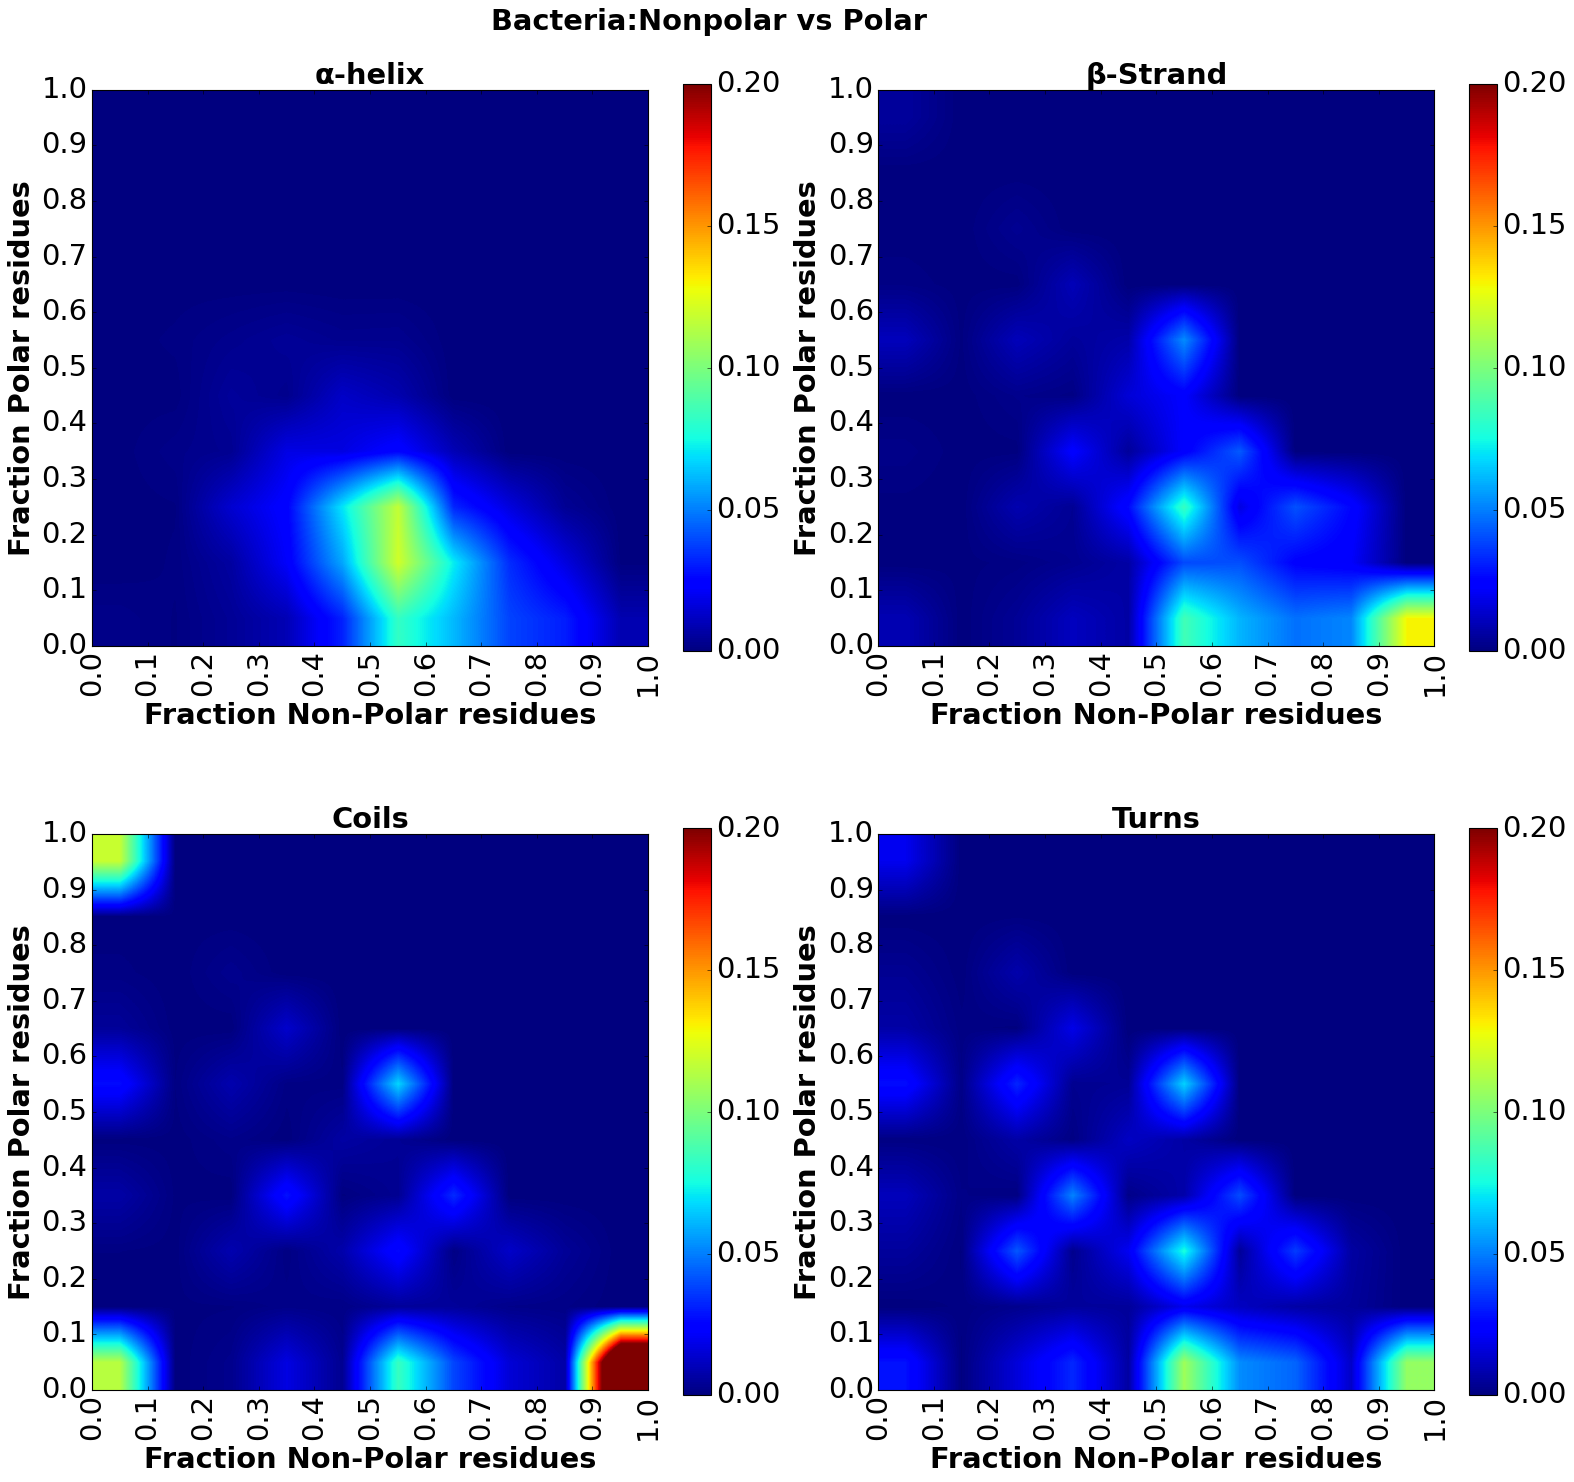

In [5]:
##Non-polar -- Polar
nbins=np.arange(0.0,1.1,0.1)
histH, xedges, yedges = np.histogram2d(dictionary['helix']['Frnonpolar'],dictionary['helix']['FrPolar'], bins=(nbins, nbins))
norm_histH=histH/len(dictionary['helix']['Frnonpolar'])
histE, xedges, yedges = np.histogram2d(dictionary['betasheet']['Frnonpolar'],dictionary['betasheet']['FrPolar'], bins=(nbins, nbins))
norm_histE=histE/len(dictionary['betasheet']['Frnonpolar'])
histT, xedges, yedges = np.histogram2d(dictionary['turns']['Frnonpolar'],dictionary['turns']['FrPolar'], bins=(nbins, nbins))
norm_histT=histT/len(dictionary['turns']['Frnonpolar'])
histC, xedges, yedges = np.histogram2d(dictionary['coil']['Frnonpolar'],dictionary['coil']['FrPolar'], bins=(nbins, nbins))
norm_histC=histC/len(dictionary['coil']['Frnonpolar'])
##
extent = [0.0, 1.0, 0.0, 1.0]
plt.figure(figsize = (20,20),facecolor='white')
plt.suptitle(organism+":Nonpolar vs Polar ", fontsize=26, y=0.95,x=0.45, fontweight="bold")
plt.subplot(2,2,1)
im=plt.imshow(norm_histH.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[1].tick_params(axis="y", labelsize=26)
plt.title("α-helix", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Non-Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Polar residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,2)
im=plt.imshow(norm_histE.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[3].tick_params(axis="y", labelsize=26)
plt.title("β-Strand", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Non-Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Polar residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,3)
im=plt.imshow(norm_histC.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[5].tick_params(axis="y", labelsize=26)
plt.title("Coils", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Non-Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Polar residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,4)
im=plt.imshow(norm_histT.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[7].tick_params(axis="y", labelsize=26)
plt.title("Turns", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Non-Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Polar residues', fontsize=26, fontweight="bold")
plt.tight_layout(h_pad=-0.2, w_pad=0.1)
plt.savefig(organism+"nonpolar_polar-heatmap.png", dpi=150,bbox_inches='tight')
plt.show()

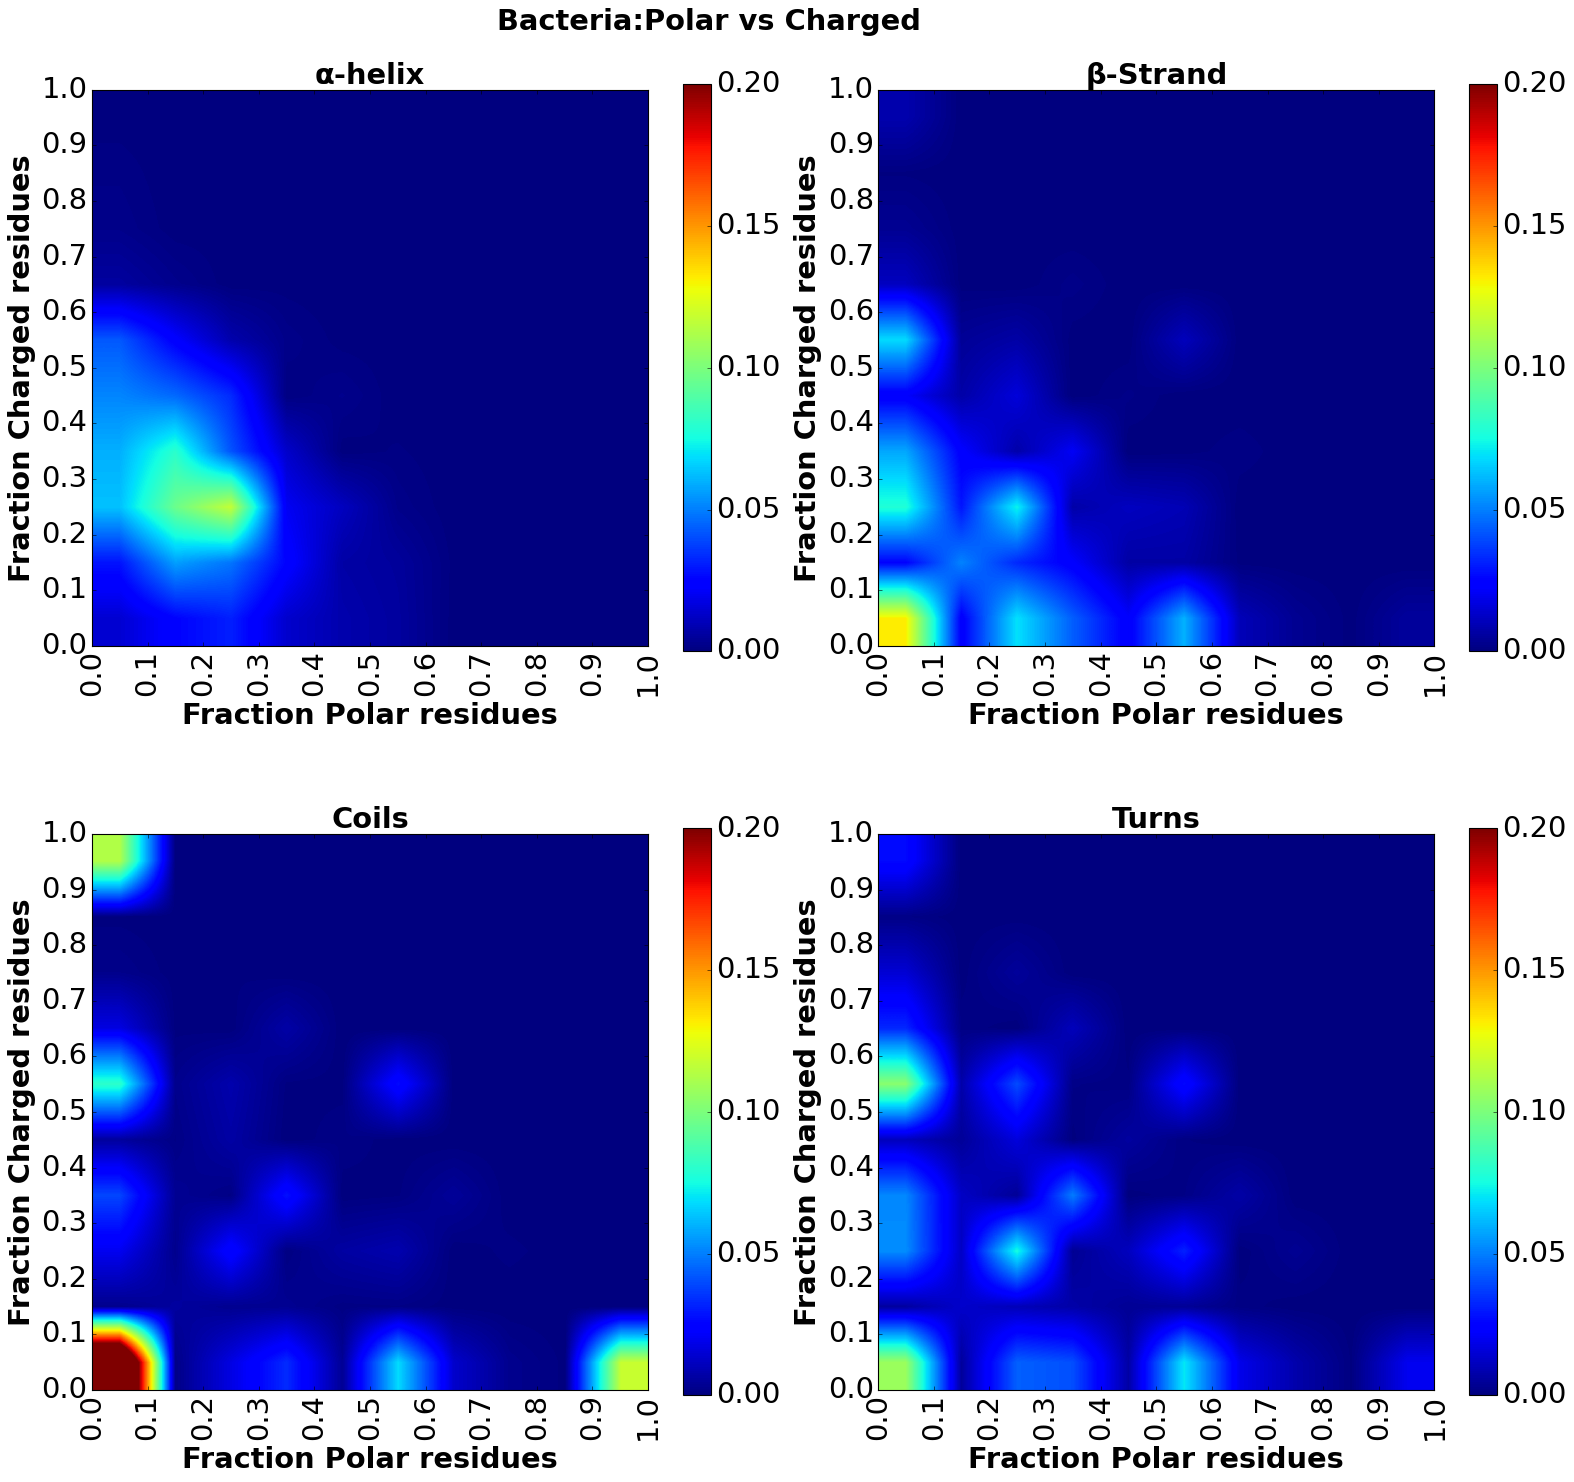

In [6]:
## POlar -- Charged
##non-polar--Charged
nbins=np.arange(0.0,1.1,0.1)
histH, xedges, yedges = np.histogram2d(dictionary['helix']['FrPolar'],dictionary['helix']['FrCharged'], bins=(nbins, nbins))
norm_histH=histH/len(dictionary['helix']['FrPolar'])
histE, xedges, yedges = np.histogram2d(dictionary['betasheet']['FrPolar'],dictionary['betasheet']['FrCharged'], bins=(nbins, nbins))
norm_histE=histE/len(dictionary['betasheet']['FrPolar'])
histT, xedges, yedges = np.histogram2d(dictionary['turns']['FrPolar'],dictionary['turns']['FrCharged'], bins=(nbins, nbins))
norm_histT=histT/len(dictionary['turns']['FrPolar'])
histC, xedges, yedges = np.histogram2d(dictionary['coil']['FrPolar'],dictionary['coil']['FrCharged'], bins=(nbins, nbins))
norm_histC=histC/len(dictionary['coil']['FrPolar'])
##
extent = [0.0, 1.0, 0.0, 1.0]
plt.figure(figsize = (20,20),facecolor='white')
plt.suptitle(organism+":Polar vs Charged ", fontsize=26, y=0.95,x=0.45, fontweight="bold")
plt.subplot(2,2,1)
im=plt.imshow(norm_histH.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[1].tick_params(axis="y", labelsize=26)
plt.title("α-helix", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,2)
im=plt.imshow(norm_histE.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[3].tick_params(axis="y", labelsize=26)
plt.title("β-Strand", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,3)
im=plt.imshow(norm_histC.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[5].tick_params(axis="y", labelsize=26)
plt.title("Coils", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,4)
im=plt.imshow(norm_histT.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[7].tick_params(axis="y", labelsize=26)
plt.title("Turns", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Polar residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.tight_layout(h_pad=-0.2, w_pad=0.1)
plt.savefig(organism+"polar_charged-heatmap.png", dpi=150,bbox_inches='tight')
plt.show()

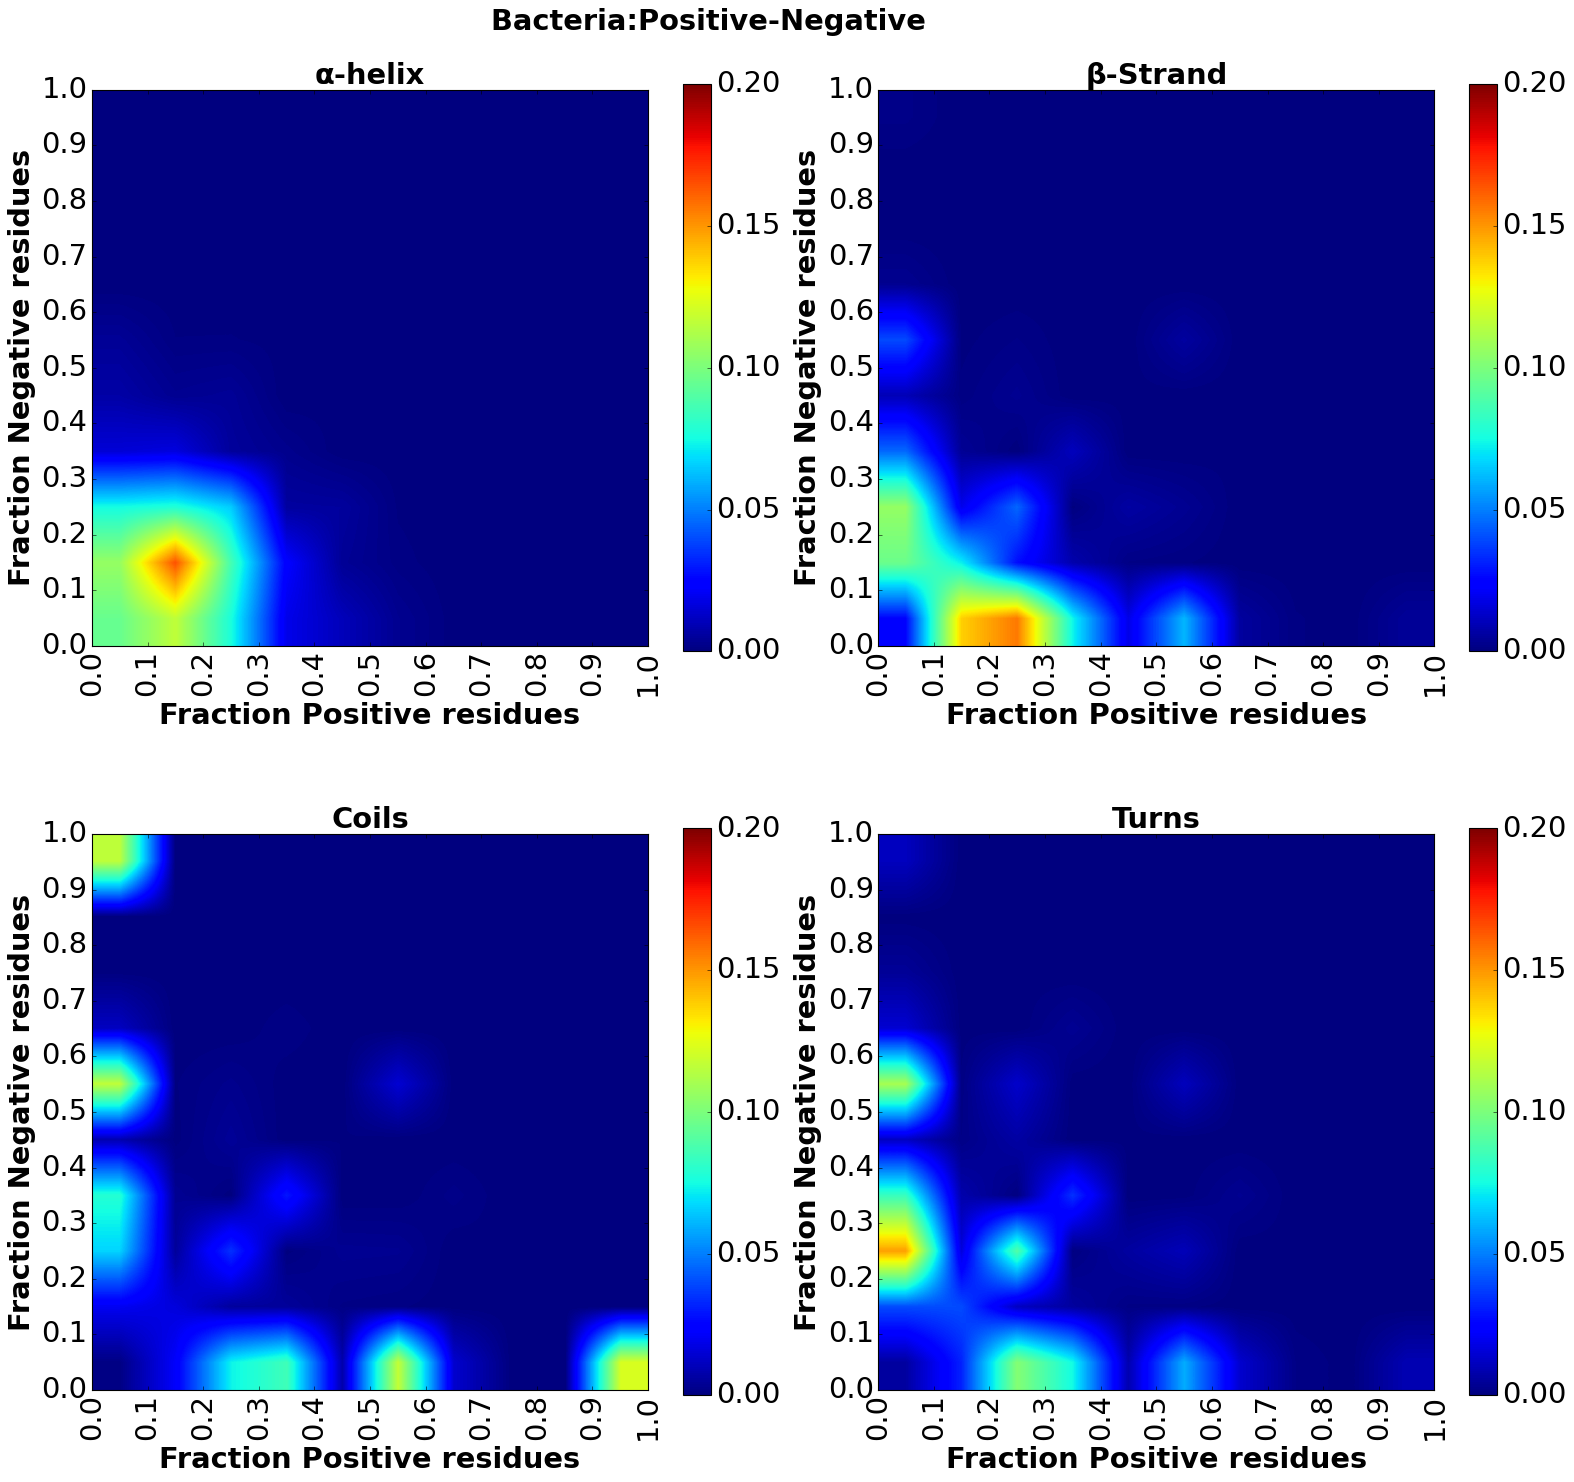

In [7]:
## Positive -- Negative
##****Phase diagram1
z=["helix","betasheet","coil","turns"]
dictionary={}
######
col_names=['Index','Name','Structure','Length','Charged-AA','Polar-AA','Non-Polar','FrCharged','FrPositive','FrNegative',
           'FrPolar','Frnonpolar', 'FrNetcharge','ChargedRes','NetChargeProtein']
for sec_st in z:
    dictionary[sec_st]={'FrCharged':[],'Frnonpolar':[]}
    filename="../all_"+sec_st+".csv"
    data=pd.read_csv(filename,names =col_names,skiprows=1,skipinitialspace=True)
    names=data.loc[:,'Name']
    #print(len(names))
    data=data[(data['Charged-AA']>0)]#(data['Length']>10) & (data['Charged-AA']>0)]
    value1=data.loc[:,'FrCharged'].tolist()
    value2=data.loc[:,'Frnonpolar'].tolist()
    value3=data.loc[:,'FrPolar'].tolist()
    value4=data.loc[:,'FrPositive'].tolist()
    value5=data.loc[:,'FrNegative'].tolist()
    dictionary[sec_st]['FrCharged']=value1
    dictionary[sec_st]['Frnonpolar']=value2
    dictionary[sec_st]['FrPolar']=value3
    dictionary[sec_st]['FrPositive']=value4
    dictionary[sec_st]['FrNegative']=value5

##non-polar--Charged
nbins=np.arange(0.0,1.1,0.1)
histH, xedges, yedges = np.histogram2d(dictionary['helix']['FrPositive'],dictionary['helix']['FrNegative'], bins=(nbins, nbins))
norm_histH=histH/len(dictionary['helix']['FrPositive'])
histE, xedges, yedges = np.histogram2d(dictionary['betasheet']['FrPositive'],dictionary['betasheet']['FrNegative'], bins=(nbins, nbins))
norm_histE=histE/len(dictionary['betasheet']['FrPositive'])
histT, xedges, yedges = np.histogram2d(dictionary['turns']['FrPositive'],dictionary['turns']['FrNegative'], bins=(nbins, nbins))
norm_histT=histT/len(dictionary['turns']['FrPositive'])
histC, xedges, yedges = np.histogram2d(dictionary['coil']['FrPositive'],dictionary['coil']['FrNegative'], bins=(nbins, nbins))
norm_histC=histC/len(dictionary['coil']['FrPositive'])
##
extent = [0.0, 1.0, 0.0, 1.0]
plt.figure(figsize = (20,20),facecolor='white')
plt.suptitle(organism+":Positive-Negative ", fontsize=26, y=0.95,x=0.45, fontweight="bold")
plt.subplot(2,2,1)
im=plt.imshow(norm_histH.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[1].tick_params(axis="y", labelsize=26)
plt.title("α-helix", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Positive residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Negative residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,2)
im=plt.imshow(norm_histE.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[3].tick_params(axis="y", labelsize=26)
plt.title("β-Strand", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Positive residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Negative residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,3)
im=plt.imshow(norm_histC.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[5].tick_params(axis="y", labelsize=26)
plt.title("Coils", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Positive residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Negative residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,4)
im=plt.imshow(norm_histT.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[7].tick_params(axis="y", labelsize=26)
plt.title("Turns", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Fraction Positive residues', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Negative residues', fontsize=26, fontweight="bold")
plt.tight_layout(h_pad=-0.2, w_pad=0.1)
plt.savefig(organism+"positive-negative-heatmap.png", dpi=150,bbox_inches='tight')
plt.show()


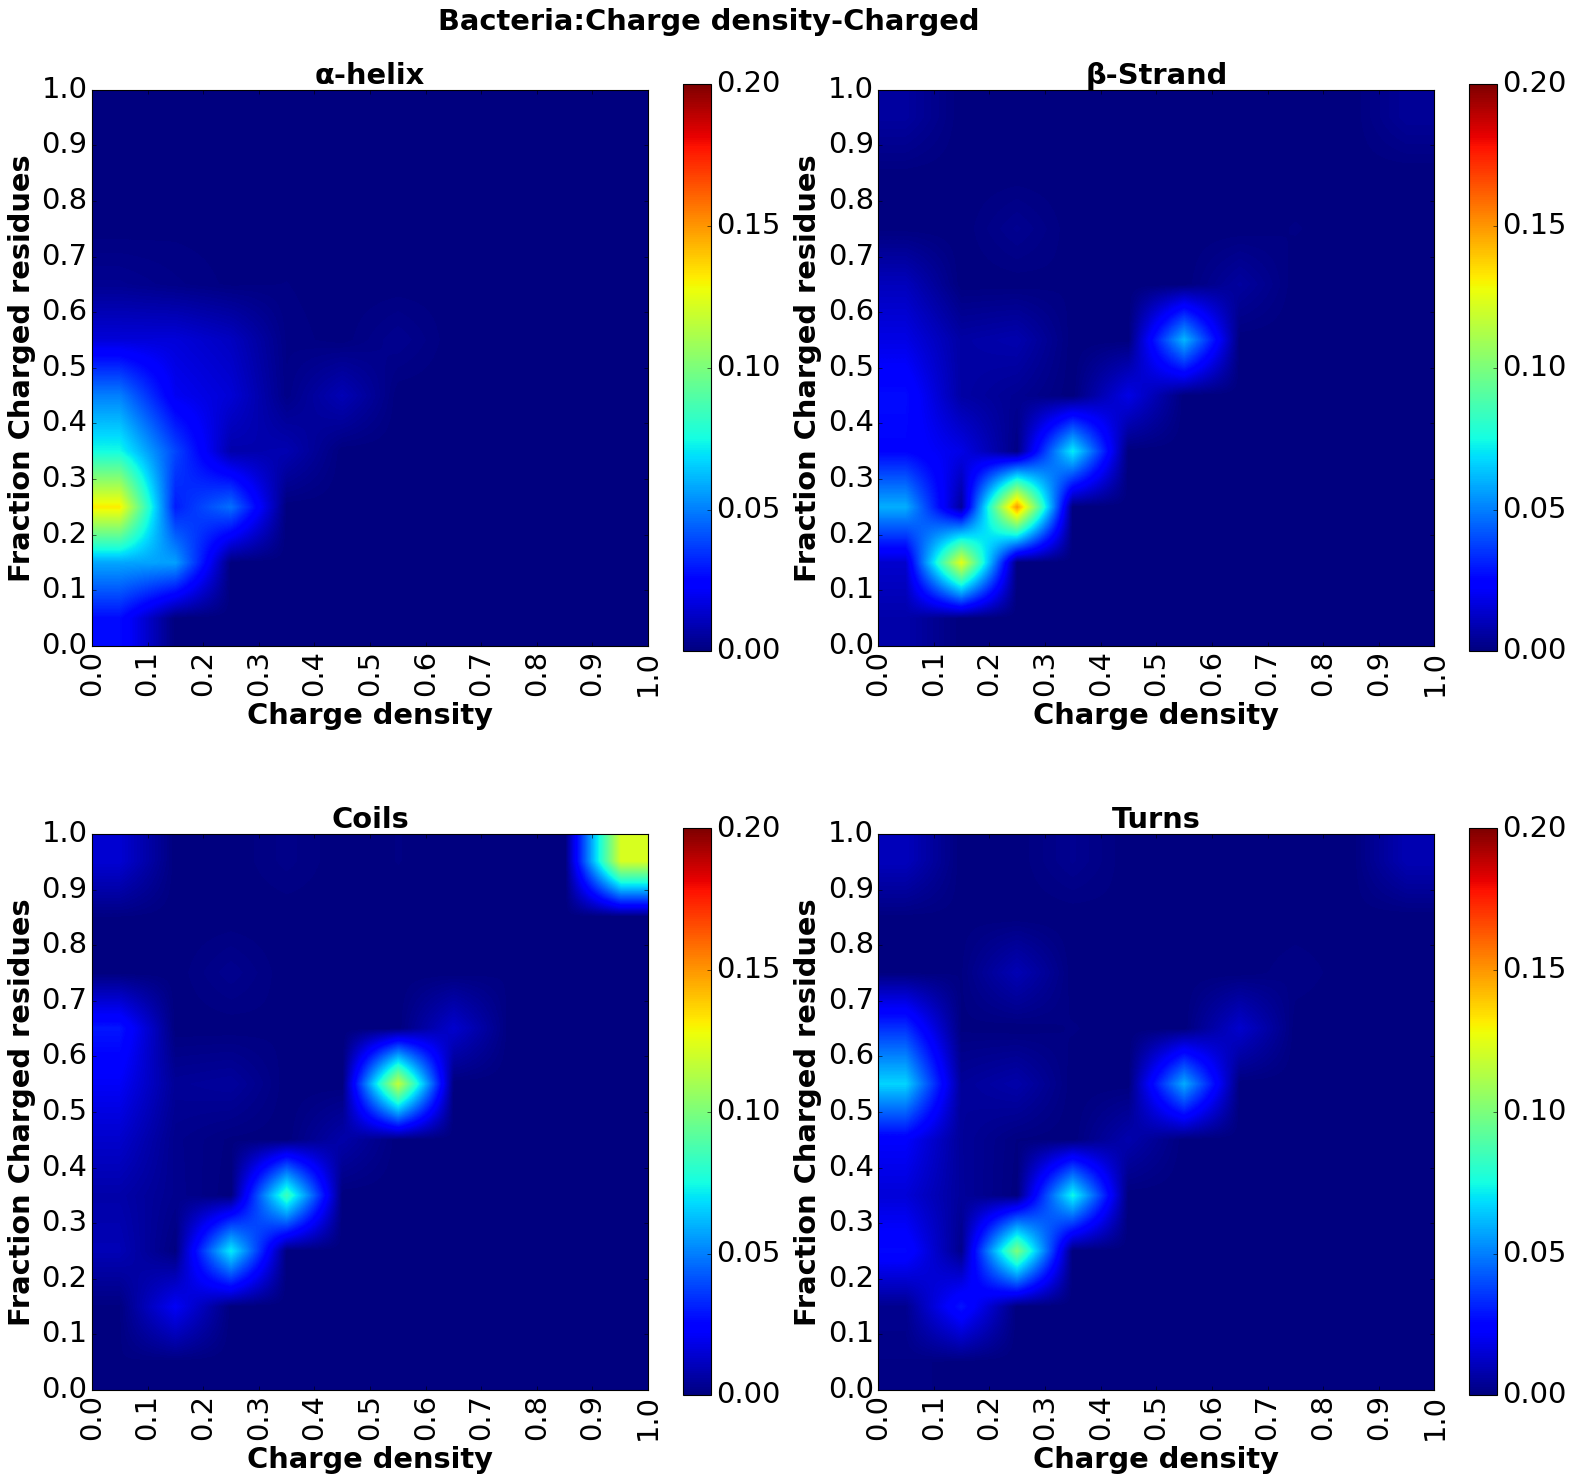

In [8]:
## Netcharge vs charge
##****Phase diagram1
z=["helix","betasheet","coil","turns"]
dictionary={}
######
col_names=['Index','Name','Structure','Length','Charged-AA','Polar-AA','Non-Polar','FrCharged','FrPositive','FrNegative',
           'FrPolar','Frnonpolar', 'FrNetcharge','ChargedRes','NetChargeProtein']
for sec_st in z:
    dictionary[sec_st]={'FrCharged':[],'Frnonpolar':[],'FrPolar':[],'FrPositive':[],'FrNegative':[],'FrNetcharge':[]}
    filename="../all_"+sec_st+".csv"
    data=pd.read_csv(filename,names =col_names,skiprows=1,skipinitialspace=True)
    names=data.loc[:,'Name']
    #print(len(names))
    data=data[(data['Charged-AA']>0)]#(data['Length']>10) & (data['Charged-AA']>0)]
    value1=data.loc[:,'FrCharged'].tolist()
    value2=data.loc[:,'Frnonpolar'].tolist()
    value3=data.loc[:,'FrPolar'].tolist()
    value4=data.loc[:,'FrPositive'].tolist()
    value5=data.loc[:,'FrNegative'].tolist()
    value6=data.loc[:,'FrNetcharge'].tolist()
    dictionary[sec_st]['FrCharged']=value1
    dictionary[sec_st]['Frnonpolar']=value2
    dictionary[sec_st]['FrPolar']=value3
    dictionary[sec_st]['FrPositive']=value4
    dictionary[sec_st]['FrNegative']=value5
    dictionary[sec_st]['FrNetcharge']=value6
##non-polar--Charged
nbins=np.arange(0.0,1.1,0.1)
histH, xedges, yedges = np.histogram2d(dictionary['helix']['FrNetcharge'],dictionary['helix']['FrCharged'], bins=(nbins, nbins))
norm_histH=histH/len(dictionary['helix']['FrNetcharge'])
histE, xedges, yedges = np.histogram2d(dictionary['betasheet']['FrNetcharge'],dictionary['betasheet']['FrCharged'], bins=(nbins, nbins))
norm_histE=histE/len(dictionary['betasheet']['FrNetcharge'])
histT, xedges, yedges = np.histogram2d(dictionary['turns']['FrNetcharge'],dictionary['turns']['FrCharged'], bins=(nbins, nbins))
norm_histT=histT/len(dictionary['turns']['FrNetcharge'])
histC, xedges, yedges = np.histogram2d(dictionary['coil']['FrNetcharge'],dictionary['coil']['FrCharged'], bins=(nbins, nbins))
norm_histC=histC/len(dictionary['coil']['FrNetcharge'])
##
extent = [0.0, 1.0, 0.0, 1.0]
plt.figure(figsize = (20,20),facecolor='white')
plt.suptitle(organism+":Charge density-Charged ", fontsize=26, y=0.95,x=0.45, fontweight="bold")
plt.subplot(2,2,1)
im=plt.imshow(norm_histH.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[1].tick_params(axis="y", labelsize=26)
plt.title("α-helix", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Charge density', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,2)
im=plt.imshow(norm_histE.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[3].tick_params(axis="y", labelsize=26)
plt.title("β-Strand", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Charge density', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,3)
im=plt.imshow(norm_histC.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[5].tick_params(axis="y", labelsize=26)
plt.title("Coils", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Charge density', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.subplot(2,2,4)
im=plt.imshow(norm_histT.T ,origin='lower', extent=extent, vmin=0.00, vmax=0.20, cmap=plt.cm.jet)
cbar = plt.colorbar(im, shrink=0.74)
im.figure.axes[7].tick_params(axis="y", labelsize=26)
plt.title("Turns", fontsize=26, fontweight="bold")
plt.xticks(np.arange(0,1.1,0.1), rotation=90, fontsize=26)
plt.yticks(np.arange(0,1.1,0.1),fontsize=26)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('Charge density', fontsize=26, fontweight="bold")
plt.ylabel('Fraction Charged residues', fontsize=26, fontweight="bold")
plt.tight_layout(h_pad=-0.2, w_pad=0.1)
plt.savefig(organism+"netcharged-charged-heatmap.png", dpi=150,bbox_inches='tight')
plt.show()
